# Reto Empresarial EAFIT
## Empresa: Proveindustriales BPO SAS

**Problema a abordar:** Mejorar la relación con los clientes desde la individualización del mismo, entendiendo sus particularidades, y a su vez conocer la demanda que se tendrá en el total de pedidos en el próximo año. Esto para permitir la actuación de una manera proactiva ante transacciones futuras.


**Solución planteada:** Realizar un modelo de clusterización, el cual nos permita segmentar a los clientes para poder generar una comunicación más asertiva y focalizada. Además se pretende realizar un modelo que prediga la cantidad de pedidos que todos los clientes van a realizar en el próximo año.

In [0]:
#Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta

import warnings
warnings.filterwarnings("ignore")

### Cargar los datos

In [0]:
data = pd.read_excel('/dbfs/mnt/commonfiles/data.xlsx')
#data = sqlContext.createDataFrame(data)

In [0]:
data.head()

Out[3]:

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.0,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10,NaN,NaN,NaN
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10,NaN,NaN,NaN
2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,Direccion 2,NaN,Centro de costos 3,Presupuesto 3,Portal comprador 1,Orden en Proceso,Lasagna,1K7609,10.0,NaN,15.500,15.500,0,155.000,155.000,2021-11-10,NaN,NaN,NaN
3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 4,Presupuesto 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,NaN,NaN,NaN
4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,Direccion 4,NaN,NaN,NaN,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10,NaN,NaN,NaN


In [0]:
print("La cantidad de filas del dataset es:", data.shape[0])
print("La cantidad de columnas del dataset es:", data.shape[1])

La cantidad de filas del dataset es: 23083
La cantidad de columnas del dataset es: 29

In [0]:
#Revisión de registros duplicados
print("Total registros duplicados:",len(data)-len(data.drop_duplicates()))

Total registros duplicados: 691

In [0]:
#Se eliminan registros duplicados
data = data.drop_duplicates()

In [0]:
#Se mira el porcentaje de valores nulos para cada columna
round(data.isna().sum()/len(data)*100,2)

Out[7]: NÚMERO PEDIDO 0.00
ORDEN NÚMERO 0.00
FECHA ORDEN 0.00
FECHA ENTREGA 19.25
FECHA APROBACION 5.06
CATEGORÍA 0.00
SUBCATEGORIA 0.00
PROVEEDOR 0.00
USUARIO 0.00
USUARIO APROBADOR 5.06
DIRECCION PEDIDO 0.00
DIRECCION FACTURACION 54.73
CENTRO DE COSTOS 28.62
PRESUPUESTO 20.11
PORTAL 0.00
ESTADO 0.00
PRODUCTO O SERVICIO 0.00
CODIGO PORTAL 21.69
CANTIDAD PEDIDA 0.00
CANTIDAD RECIBIDA 31.56
PRECIO UNITARIO 0.00
PRECIO UNITARIO + IVA 0.00
IVA 0.00
TOTAL SIN IVA 0.00
TOTAL + IVA 0.00
FECHA ULTIMO MOVIMIENTO 0.00
Unnamed: 26 100.00
Unnamed: 27 100.00
Unnamed: 28 99.95
dtype: float64

### Limpieza y transformación de datos

In [0]:
#Inicialmente eliminamos los registros de los pedidos cancelados y de las orden rechazadas
data = data[-data.ESTADO.isin(['Cancelado', 'Orden Rechazada'])]

In [0]:
#Se eliminan las variables que por conocimiento no se consideran necesarias para la solución del problema
data1 = data.drop(['FECHA ENTREGA','FECHA APROBACION','PROVEEDOR','USUARIO APROBADOR','DIRECCION PEDIDO', 'ORDEN NÚMERO',
                   'DIRECCION FACTURACION','CENTRO DE COSTOS','PRESUPUESTO', 'PORTAL', 'CODIGO PORTAL', 'CANTIDAD RECIBIDA', 
                   'PRECIO UNITARIO + IVA', 'IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO', 'PRECIO UNITARIO', 'TOTAL SIN IVA',
                   'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'SUBCATEGORIA', 'ESTADO'], axis=1)

In [0]:
data1.dtypes

Out[10]: NÚMERO PEDIDO object
FECHA ORDEN object
CATEGORÍA object
USUARIO object
PRODUCTO O SERVICIO object
CANTIDAD PEDIDA float64
dtype: object

In [0]:
#Convertimos a tipo fecha la fecha de orden para poder crear nuevos features como el año de la orden
# y convertimos en valores flotantes el  precio unitario y total sin iva
data1['FECHA ORDEN'] = data1['FECHA ORDEN'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
#data1[['PRECIO UNITARIO', 'TOTAL SIN IVA']] = data1[['PRECIO UNITARIO', 'TOTAL SIN IVA']].replace("\.", "", regex=True)
#data1[['PRECIO UNITARIO', 'TOTAL SIN IVA']] = data1[['PRECIO UNITARIO', 'TOTAL SIN IVA']].astype(int)

In [0]:
#Se crea una nueva variable, la cual es el año de la orden
data1['AÑO ORDEN'] = data1['FECHA ORDEN'].apply(lambda x:x.year)

### Construcción conjunto de datos para clusterización

Para dar solución a la segmentación de los clientes se debe construir un conjunto de datos a nivel de cliente (USUARIO). Se definió construir las siguientes variables: **Total de pedidos realizados, Antigüedad del cliente, Promedio de pedidos realizados por año, Promedio de productos por pedidos, total de pedidos por categoría**.

In [0]:
#Total pedidos realizados
Total_Pedidos = data1.groupby(['USUARIO'],as_index=False)['NÚMERO PEDIDO'].nunique()
Total_Pedidos = Total_Pedidos.rename(columns={'NÚMERO PEDIDO': 'Total_Pedidos_Realizados'})

In [0]:
#Antiguedad cliente
Fecha_Hoy = datetime.today()
Fecha_Primer_Pedido = data1.groupby(['USUARIO'],as_index=False)['FECHA ORDEN'].min()
Fecha_Primer_Pedido['Antiguedad_Cliente_Annos'] = Fecha_Primer_Pedido['FECHA ORDEN'].apply(lambda x:(Fecha_Hoy - x).days/365)
Antiguedad_Cliente_Annos = Fecha_Primer_Pedido[['USUARIO', 'Antiguedad_Cliente_Annos']]

In [0]:
#Promedio pedidos realizados por año
Total_Pedidos_Anno = data1.groupby(['USUARIO', 'AÑO ORDEN'],as_index=False)['NÚMERO PEDIDO'].nunique()
Anno_Minimo = data1.groupby(['USUARIO'],as_index=False)['AÑO ORDEN'].min()
A2018 = Anno_Minimo['AÑO ORDEN']<=2018
A2019 = Anno_Minimo['AÑO ORDEN']<=2019
A2020 = Anno_Minimo['AÑO ORDEN']<=2020
A2021 = Anno_Minimo['AÑO ORDEN']<=2021
Anno_Minimo['2018'] = ''
Anno_Minimo['2018'][A2018] = 'S'
Anno_Minimo['2019'] = ''
Anno_Minimo['2019'][A2019] = 'S'
Anno_Minimo['2020'] = ''
Anno_Minimo['2020'][A2020] = 'S'
Anno_Minimo['2021'] = ''
Anno_Minimo['2021'][A2021] = 'S'
del Anno_Minimo['AÑO ORDEN']
Annos_Presencia = pd.melt(Anno_Minimo, id_vars='USUARIO')
Annos_Presencia = Annos_Presencia[Annos_Presencia.value == 'S']
del Annos_Presencia['value']
Annos_Presencia = Annos_Presencia.rename(columns={'variable': 'AÑO ORDEN'})
Annos_Presencia['AÑO ORDEN'] = Annos_Presencia['AÑO ORDEN'].astype(int)

Total_Pedidos_Anno2 = Annos_Presencia.merge(Total_Pedidos_Anno, on = ['USUARIO', 'AÑO ORDEN'], how='left')
Total_Pedidos_Anno2['NÚMERO PEDIDO'].fillna(0, inplace = True)

Promedio_Pedidos_Anno = Total_Pedidos_Anno2.groupby(['USUARIO'],as_index=False)['NÚMERO PEDIDO'].mean()
Promedio_Pedidos_Anno = Promedio_Pedidos_Anno.rename(columns={'NÚMERO PEDIDO': 'Promedio_Pedidos_Realizados_Anno'})

In [0]:
#Promedio productos por pedido
Total_Productos_Pedidos = data1.groupby(['USUARIO', 'NÚMERO PEDIDO'],as_index=False)['PRODUCTO O SERVICIO'].nunique()
Promedio_Productos_Pedido = Total_Productos_Pedidos.groupby(['USUARIO'],as_index=False)['PRODUCTO O SERVICIO'].mean()
Promedio_Productos_Pedido = Promedio_Productos_Pedido.rename(columns={'PRODUCTO O SERVICIO': 'Promedio_Productos_Pedido'})

In [0]:
#Total pedidos por categoría
#Inicialmente se analiza la cantidad de categoría que se tienen y como se distribuyen
data1['CATEGORÍA'].describe()

Out[17]: count 20241
unique 36
top Alimentos y Bebidas
freq 6284
Name: CATEGORÍA, dtype: object

In [0]:
(data1['CATEGORÍA'].value_counts()/len(data1))*100

Out[18]: Alimentos y Bebidas 31.045897
Vigilancia y seguridad industrial 29.741614
Aseo, Cafetería y Oficina 16.451756
Ferreteria 3.700410
Dotación y elementos de protección personal 3.581839
Almacenamiento y empaques 1.892199
Químicos y derivados 1.580950
Vehículos y repuestos 1.531545
Construcción y Mantenimiento 1.378390
Servicios Profesionales 1.126427
Manufactura 0.968332
Mercadeo y publicidad 0.943629
Logística y transporte 0.829999
Eléctricos y Electrónicos 0.746011
Textiles 0.686725
Moda y accesorios 0.676844
Tecnología e información 0.627439
Mobiliario y decoración 0.523690
Imprenta y litografía 0.439702
Ingeniería e Investigación 0.424880
Compras Sostenibles 0.222321
Gestión ambiental 0.197619
Vigilancia y seguridad 0.123512
Salud y Medicina 0.118571
Hogar y electrodomésticos 0.118571
Viajes, Eventos y Entretenimiento 0.083988
Medicina y Salud 0.059286
Cuidado personal y Belleza 0.039524
Deporte y recreación 0.029643
Servicios Públicos 0.029643
Agroindustrial 0.024702
Minería 0.014821
Gestión inmobiliaria 0.014821
Generación y distribución de Energía 0.014821
Producción audiovisual 0.004940
Educación y formación empresarial 0.004940
Name: CATEGORÍA, dtype: float64

En la anterior tabla se puede ver que dentro del top 10 tenemos aproximadamente el 92% de los datos, y de ahí en adelante cada categoría representa menos del 1% de los datos, por lo cual se decide crear una categoría que se llame **Otras Categorías** que contenga a todas estas categorías.

In [0]:
Top10 = data1['CATEGORÍA'].isin(['Alimentos y Bebidas','Vigilancia y seguridad industrial', 'Aseo, Cafetería y Oficina',
                                 'Dotación y elementos de protección personal', 'Ferreteria', 'Almacenamiento y empaques', 
                                 'Vehículos y repuestos', 'Químicos y derivados', 'Construcción y Mantenimiento',
                                 'Servicios Profesionales'])

In [0]:
data1['CATEGORÍA HOM'] = ''
data1['CATEGORÍA HOM'][-Top10] = 'Otras Categorías'
data1['CATEGORÍA HOM'][Top10] = data1['CATEGORÍA'][Top10].apply(lambda x:x)

In [0]:
Total_Pedidos_Categoria = data1.groupby(['USUARIO', 'CATEGORÍA HOM'],as_index=False)['NÚMERO PEDIDO'].nunique()
Total_Pedidos_Categoria = Total_Pedidos_Categoria.rename(columns={'NÚMERO PEDIDO': 'Total_Pedidos_Realizados'})

In [0]:
#Los datos requieren de un pivoteo para poder tenerlos a nivel de cliente
Total_Pedidos_Categoria_Piv = Total_Pedidos_Categoria.pivot(index='USUARIO',columns= 'CATEGORÍA HOM',
                                                            values='Total_Pedidos_Realizados')
Total_Pedidos_Categoria_Piv.fillna(0,inplace=True)
Total_Pedidos_Categoria_Piv = Total_Pedidos_Categoria_Piv.add_prefix('Total_Pedidos_')

In [0]:
#Se unifican todas las variables creadas en una base datos
data_pre1 = Total_Pedidos.merge(Antiguedad_Cliente_Annos, on='USUARIO', how='left')
data_pre2 = data_pre1.merge(Promedio_Pedidos_Anno, on='USUARIO', how='left')
data_pre3 = data_pre2.merge(Promedio_Productos_Pedido, on='USUARIO', how='left')
data_cluster = data_pre3.merge(Total_Pedidos_Categoria_Piv, on='USUARIO', how='left')
data_cluster.set_index('USUARIO',inplace = True)

### Análisis descriptivo de los datos

In [0]:
data_cluster.describe().T

Out[24]:

,count,mean,std,min,25%,50%,75%,max
Total_Pedidos_Realizados,127.0,51.511811,176.644512,1.000000,2.000000,6.000000,21.500000,1523.000000
Antiguedad_Cliente_Annos,127.0,1.184101,0.845866,0.071233,0.552055,1.120548,1.446575,3.605479
Promedio_Pedidos_Realizados_Anno,127.0,24.811024,69.787952,0.250000,1.500000,5.000000,13.000000,507.666667
Promedio_Productos_Pedido,127.0,3.468591,4.978613,1.000000,1.058824,1.915663,4.102209,36.000000
Total_Pedidos_Alimentos y Bebidas,127.0,16.141732,98.224211,0.000000,0.000000,0.000000,0.000000,908.000000
Total_Pedidos_Almacenamiento y empaques,127.0,2.149606,10.377080,0.000000,0.000000,0.000000,0.000000,91.000000
"Total_Pedidos_Aseo, Cafetería y Oficina",127.0,5.779528,13.603170,0.000000,0.000000,1.000000,5.000000,99.000000
Total_Pedidos_Construcción y Mantenimiento,127.0,1.559055,7.757898,0.000000,0.000000,0.000000,0.000000,64.000000
Total_Pedidos_Dotación y elementos de protección personal,127.0,1.165354,2.629997,0.000000,0.000000,0.000000,1.000000,13.000000
Total_Pedidos_Ferreteria,127.0,2.708661,15.427305,0.000000,0.000000,0.000000,0.000000,143.000000


De lo anterior se puede observar, que tenemos en nuetro conjunto de datos 127 clientes (Usuarios). De los cuales podemos ver que al menos el 75% de los clientes ha realizado 21.5 pedidos o menos. También observamos que tenemos un valor máximo en el total de pedidos realizados de 1523, lo cual para nuestros datos es un valor atipico pero representa que hay un cliente que utiliza bastante los servicios ofrecidos.

En la antigüedad de los clientes se observa que en promedio se tienen clientes que hace 1.17 años realizaron su primer pedido en la plataforma, y el cliente más antiguo lo realizó hace 3.6 años.

También se puede observar que al menos el 75% de los clientes no ha adquirido productos de las categorías de alimentos y bebidas, almacenamiento y empaques, construcción y mantenimiento, ferretería, químicos y derivados, servicios profesionales, vehículos y repuestos y vigilancia y seguridad industrial.

### Revisión de valores atípicos

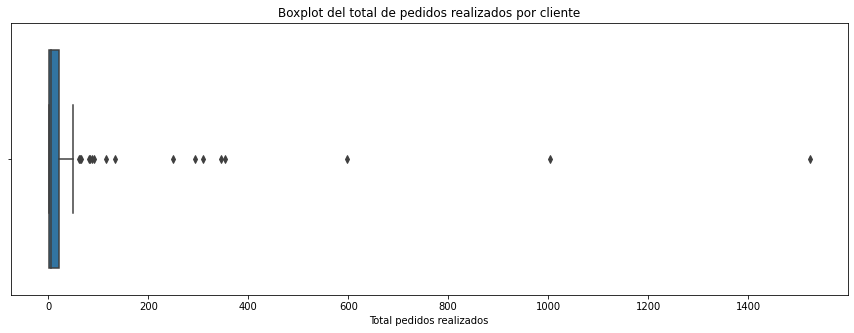

In [0]:
plt.figure(figsize = (15,5))
sns.boxplot(data = data_cluster, x = "Total_Pedidos_Realizados")
plt.title('Boxplot del total de pedidos realizados por cliente')
plt.xlabel('Total pedidos realizados')
plt.show()

Dado el comportamiento de los valores atípicos que se presentan en el total de pedidos, se observa que se evidencian ciertos grupos dadas las cantidades de pedidos realizadas.

### Correlación de variables

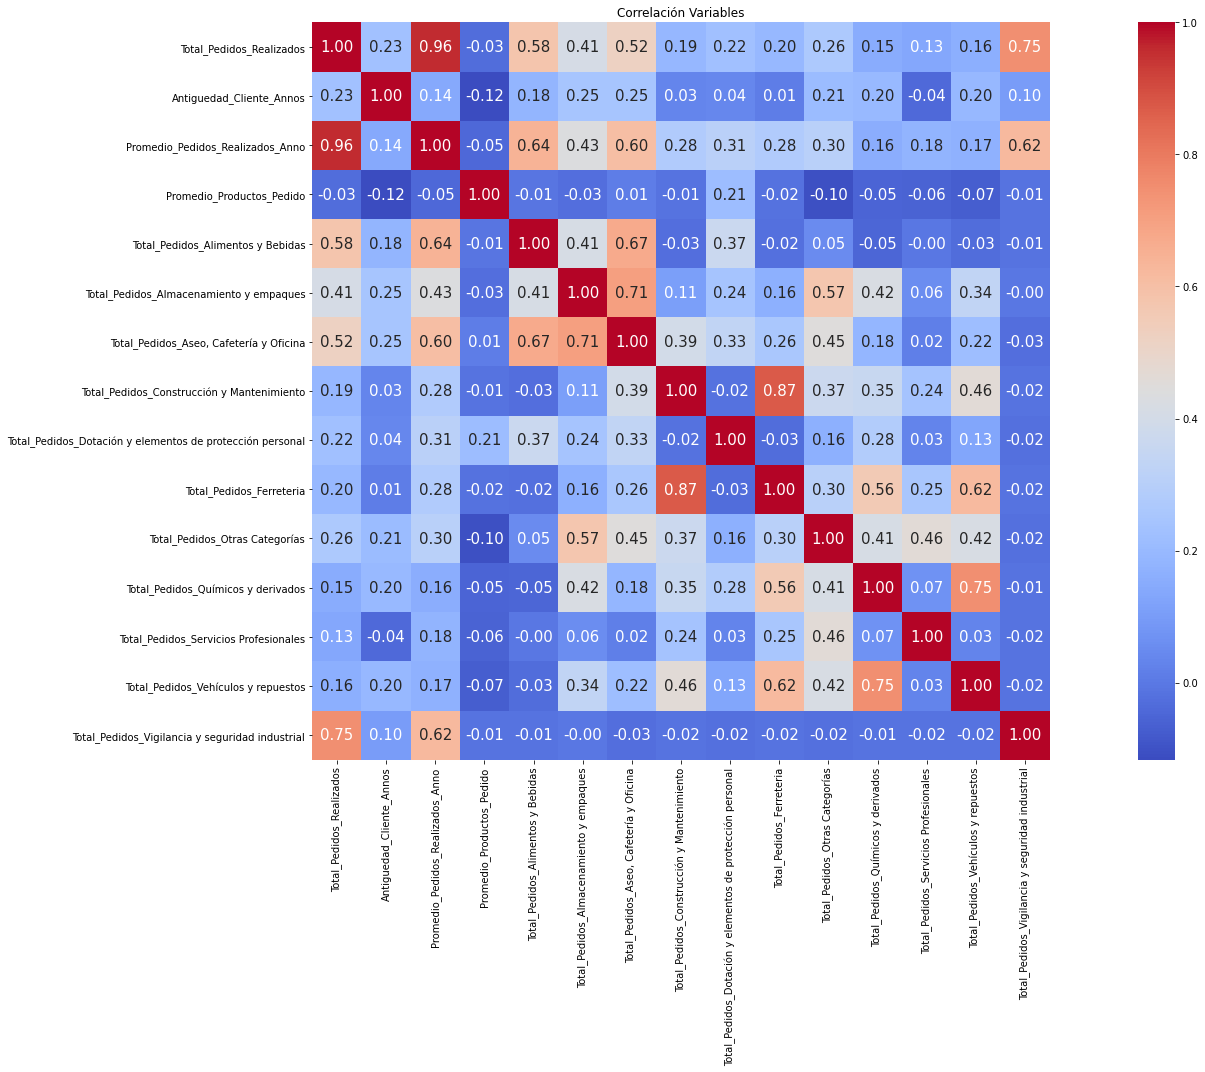

In [0]:
corr = data_cluster.corr()
                   
plt.figure(figsize = (25,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr.columns, 
           yticklabels= corr.columns,
           cmap= 'coolwarm')
plt.title('Correlación Variables')
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.tight_layout()
plt.show()

En el anterio gráfico de correlación se observa una muy fuerte relación entre el total de pedidos y el promedio de pedidos realizados por año, por lo cual se decide eliminar la variable del promedio de pedidos realizados por año.

También se puede concluir que a medida que crezcan los pedidos realizados que contengan productos de a categoría **Vehículos y repuestos** también lo hacen en gran medida los de la categoría **Químicos y derivados**, **Ferretería** y **Construcción y Mantenimiento**. Lo mismo sucede cuando crecen los pedidos realizados en la categoría de **Aseo, cafetería y oficina** también crecen los de **Alimentos y bebidas** y **Almacenamiento y empaques**.

In [0]:
del data_cluster['Promedio_Pedidos_Realizados_Anno']

### Clusterización

In [0]:
#data_cluster1 = data_cluster[data_cluster.Total_Pedidos_Realizados < 200]

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [0]:
cost_Kmeans = []

In [0]:
for i in range(1, 15): 
    #Kmeans
    kmeans = KMeans(n_clusters = i, random_state=42) 
    kmeans.fit(data_cluster)

    #Costos
    cost_Kmeans.append(kmeans.inertia_)

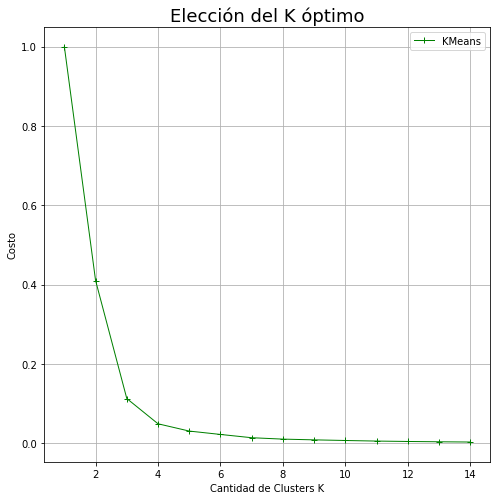

In [0]:
plt.figure(figsize=(8, 8))
plt.title('Elección del K óptimo',size=18)
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Costo')
plt.plot(range(1, 15), np.array(cost_Kmeans)/cost_Kmeans[0], color ='g', linewidth ='1', marker = '+', label = 'KMeans')
plt.legend()
plt.grid(True)
plt.show()

In [0]:
ModeloFinal = KMeans(n_clusters = 5, random_state=42) 
Clusters = ModeloFinal.fit_predict(data_cluster)

In [0]:
#vemos el representante del cluster, el cliente(usuario) más cercano a cada centroide
closest, _ = pairwise_distances_argmin_min(ModeloFinal.cluster_centers_, data_cluster)
#closest

In [0]:
#Clientes representativos de cada clúster
users = data_cluster.index
for row in closest:
    print(users[row])

Usuario solicitante 42
Usuario solicitante 122
Usuario solicitante 4
Usuario solicitante 11
Usuario solicitante 129

In [0]:
Caracteristicas_Cluster = pd.DataFrame(ModeloFinal.cluster_centers_, columns = data_cluster.columns)
Caracteristicas_Cluster['Cluster'] = Caracteristicas_Cluster.index

In [0]:
data_cluster['Cluster'] = Clusters
data_cluster['Cluster'].value_counts()

Out[37]: 0 119
3 5
1 1
2 1
4 1
Name: Cluster, dtype: int64

In [0]:
Caracteristicas_ClusterPivot = pd.melt(Caracteristicas_Cluster, id_vars='Cluster')
Caracteristicas_ClusterPivotClean = Caracteristicas_ClusterPivot[Caracteristicas_ClusterPivot.value > 1]

## Cluster 0

In [0]:
Caracteristicas_ClusterPivotClean[Caracteristicas_ClusterPivotClean.Cluster == 0][['variable', 'value']]

Out[39]:

,variable,value
0,Total_Pedidos_Realizados,15.697479
5,Antiguedad_Cliente_Annos,1.125981
10,Promedio_Productos_Pedido,3.502117
15,Total_Pedidos_Alimentos y Bebidas,2.285714
25,"Total_Pedidos_Aseo, Cafetería y Oficina",3.336134
35,Total_Pedidos_Dotación y elementos de protecci...,1.042017
45,Total_Pedidos_Otras Categorías,6.109244
50,Total_Pedidos_Químicos y derivados,1.100840
60,Total_Pedidos_Vehículos y repuestos,1.033613
65,Total_Pedidos_Vigilancia y seguridad industrial,1.193277


## Cluster 1

In [0]:
Caracteristicas_ClusterPivotClean[Caracteristicas_ClusterPivotClean.Cluster == 1][['variable', 'value']]

Out[40]:

,variable,value
1,Total_Pedidos_Realizados,1523.000000
6,Antiguedad_Cliente_Annos,2.043836
11,Promedio_Productos_Pedido,2.786605
66,Total_Pedidos_Vigilancia y seguridad industrial,1523.000000


## Cluster 2

In [0]:
Caracteristicas_ClusterPivotClean[Caracteristicas_ClusterPivotClean.Cluster == 2][['variable', 'value']]

Out[41]:

,variable,value
2,Total_Pedidos_Realizados,1003.000000
7,Antiguedad_Cliente_Annos,1.780822
12,Promedio_Productos_Pedido,1.877368
17,Total_Pedidos_Alimentos y Bebidas,908.000000
22,Total_Pedidos_Almacenamiento y empaques,47.000000
27,"Total_Pedidos_Aseo, Cafetería y Oficina",99.000000
37,Total_Pedidos_Dotación y elementos de protecci...,13.000000
47,Total_Pedidos_Otras Categorías,21.000000
67,Total_Pedidos_Vigilancia y seguridad industrial,5.000000


## Cluster 3

In [0]:
Caracteristicas_ClusterPivotClean[Caracteristicas_ClusterPivotClean.Cluster == 3][['variable', 'value']]

Out[42]:

,variable,value
3,Total_Pedidos_Realizados,310.200000
8,Antiguedad_Cliente_Annos,1.796712
13,Promedio_Productos_Pedido,2.709813
18,Total_Pedidos_Alimentos y Bebidas,57.800000
23,Total_Pedidos_Almacenamiento y empaques,36.000000
28,"Total_Pedidos_Aseo, Cafetería y Oficina",41.000000
33,Total_Pedidos_Construcción y Mantenimiento,26.200000
38,Total_Pedidos_Dotación y elementos de protecci...,2.200000
43,Total_Pedidos_Ferreteria,52.800000
48,Total_Pedidos_Otras Categorías,71.000000


## Cluster 4

In [0]:
Caracteristicas_ClusterPivotClean[Caracteristicas_ClusterPivotClean.Cluster == 4][['variable', 'value']]

Out[43]:

,variable,value
4,Total_Pedidos_Realizados,597.000000
9,Antiguedad_Cliente_Annos,3.580822
14,Promedio_Productos_Pedido,5.546064
19,Total_Pedidos_Alimentos y Bebidas,581.000000
29,"Total_Pedidos_Aseo, Cafetería y Oficina",33.000000


In [0]:
#Exportar resultados clusterización
data_cluster[['Cluster']].to_csv("/dbfs/mnt/commonfiles/Cluster_Clientes.csv")

## Organizar conjunto de datos para aplicar modelo de serie de tiempo

In [0]:
data_ts = data1.groupby(['FECHA ORDEN'],as_index=False)['NÚMERO PEDIDO'].nunique()
data_ts = data_ts.rename(columns={'FECHA ORDEN': 'ds', 'NÚMERO PEDIDO': 'y'})

In [0]:
from prophet import Prophet
#https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation

In [0]:
model_ts = Prophet(interval_width = 0.95, daily_seasonality=True)
model_ts.fit(data_ts)

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
Out[47]: <prophet.forecaster.Prophet at 0x7fc3a5e48a30>INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

In [0]:
#Pronóstico para el próximo año
pronostico_365 = model_ts.make_future_dataframe(periods = 365)

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

In [0]:
prediccion = model_ts.predict(pronostico_365)

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

In [0]:
prediccion[['ds', 'yhat']].head()

Out[50]:

,ds,yhat
0,2018-04-30,4.815315
1,2018-05-01,6.128278
2,2018-05-02,3.702204
3,2018-05-04,4.060764
4,2018-05-05,0.804065


INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

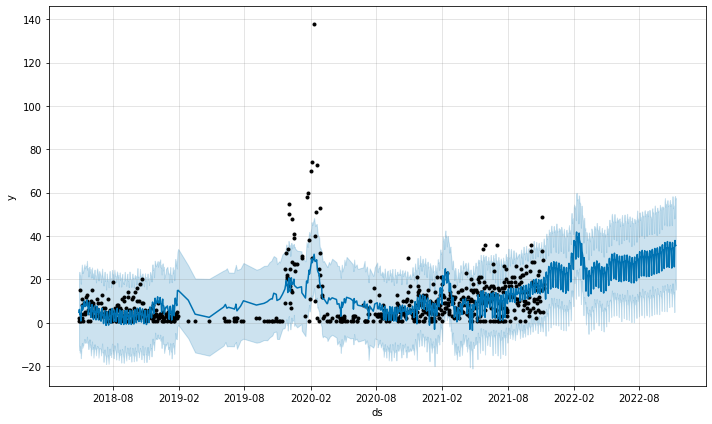

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

In [0]:
fig1 = model_ts.plot(prediccion)

In [0]:
#Exportar resultados serie de tiempo
prediccion[['ds', 'yhat']].to_csv("/dbfs/mnt/commonfiles/prediccion.csv")

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

--------------------------------------------------------------------------- 
 OSError Traceback (most recent call last)
 <command-2000241453440845> in <module> 
 1 #Exportar resultados serie de tiempo 
 ----> 2 prediccion [ [ 'ds' , 'yhat' ] ] . to_excel ( "/dbfs/mnt/commonfiles/prediccion.xlsx" ) 

 /databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in to_excel (self, excel_writer, sheet_name, na_rep, float_format, columns, header, index, index_label, startrow, startcol, engine, merge_cells, encoding, inf_rep, verbose, freeze_panes, storage_options) 
 2187 inf_rep = inf_rep , 
 2188 )
 -> 2189 formatter.write(
 2190 excel_writer , 
 2191 sheet_name = sheet_name , 

 /databricks/python/lib/python3.8/site-packages/pandas/io/formats/excel.py in write (self, writer, sheet_name, startrow, startcol, freeze_panes, engine, storage_options) 
 829 # make sure to close opened file handles 
 830 if need_save : 
 --> 831 writer . close ( ) 

 /databricks/python/lib/python3.8/site-packages/pandas/io/excel/_base.py in close (self) 
 896 def close ( self ) : 
 897 """synonym for save, to make it more file-like""" 
 --> 898 content = self . save ( ) 
 899 self . handles . close ( ) 
 900 return content

 /databricks/python/lib/python3.8/site-packages/pandas/io/excel/_openpyxl.py in save (self) 
 52 Save workbook to disk . 
 53 """
 ---> 54 self . book . save ( self . handles . handle ) 
 55 if "r+" in self . mode and not isinstance ( self . handles . handle , mmap . mmap ) : 
 56 # truncate file to the written content 

 /databricks/python/lib/python3.8/site-packages/openpyxl/workbook/workbook.py in save (self, filename) 
 405 if self . write_only and not self . worksheets : 
 406 self . create_sheet ( ) 
 --> 407 save_workbook ( self , filename ) 
 408 
 409 

 /databricks/python/lib/python3.8/site-packages/openpyxl/writer/excel.py in save_workbook (workbook, filename) 
 291 archive = ZipFile ( filename , 'w' , ZIP_DEFLATED , allowZip64 = True ) 
 292 writer = ExcelWriter ( workbook , archive ) 
 --> 293 writer . save ( ) 
 294 return True 
 295 

 /databricks/python/lib/python3.8/site-packages/openpyxl/writer/excel.py in save (self) 
 273 def save ( self ) : 
 274 """Write data into the archive.""" 
 --> 275 self . write_data ( ) 
 276 self . _archive . close ( ) 
 277 

 /databricks/python/lib/python3.8/site-packages/openpyxl/writer/excel.py in write_data (self) 
 65 
 66 props = ExtendedProperties ( ) 
 ---> 67 archive . writestr ( ARC_APP , tostring ( props . to_tree ( ) ) ) 
 68 
 69 archive . writestr ( ARC_CORE , tostring ( self . workbook . properties . to_tree ( ) ) ) 

 /usr/lib/python3.8/zipfile.py in writestr (self, zinfo_or_arcname, data, compress_type, compresslevel) 
 1815 with self . _lock : 
 1816 with self . open ( zinfo , mode = 'w' ) as dest : 
 -> 1817 dest . write ( data ) 
 1818 
 1819 def __del__ ( self ) : 

 /usr/lib/python3.8/zipfile.py in close (self) 
 1180 self . _fileobj . seek ( self . _zinfo . header_offset ) 
 1181 self . _fileobj . write ( self . _zinfo . FileHeader ( self . _zip64 ) ) 
 -> 1182 self . _fileobj . seek ( self . _zipfile . start_dir ) 
 1183 
 1184 # Successfully written: Add file to our caches 

 OSError : [Errno 95] Operation not supported